In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [2]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.duplicated().sum()
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
cat_col = df.select_dtypes(include="O")
cat_col.head()

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,drugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,drugY


In [6]:
num_col = df.select_dtypes(exclude="O")
num_col.head()

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043


In [7]:
from sklearn.preprocessing import LabelEncoder
dict = {}
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    dict[col]=le
# print("Encoded columns:",cat_col.tolist())

In [8]:
x= df.drop("Drug",axis=1)
y = df[['Drug']]

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,
    random_state=42
)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
dt.score(x_test,y_test)

1.0

In [12]:
dt.score(x_train,y_train)

1.0

In [13]:
pred = dt.predict(x_test)
y_test["prediction"]=pred
y_test

,Drug,prediction
95,3,3
15,4,4
30,3,3
158,2,2
128,4,4
115,4,4
69,4,4
170,3,3
174,0,0
45,3,3


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
confusion_matrix(y_test["Drug"],y_test["prediction"])

array([[ 6,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0, 15]], dtype=int64)

<Axes: >

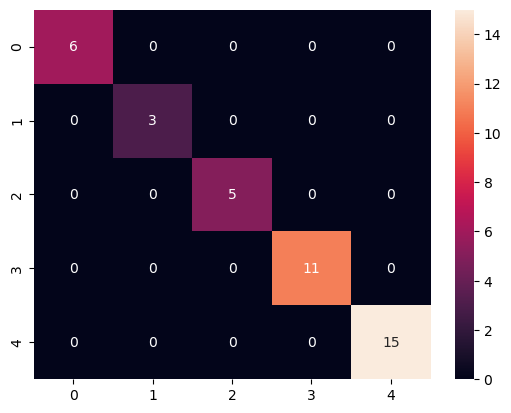

In [16]:
sns.heatmap(confusion_matrix(y_test["Drug"],y_test["prediction"]),annot=True,fmt="d")

In [17]:
print(classification_report(y_test["Drug"],y_test["prediction"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [18]:
from sklearn.tree import plot_tree

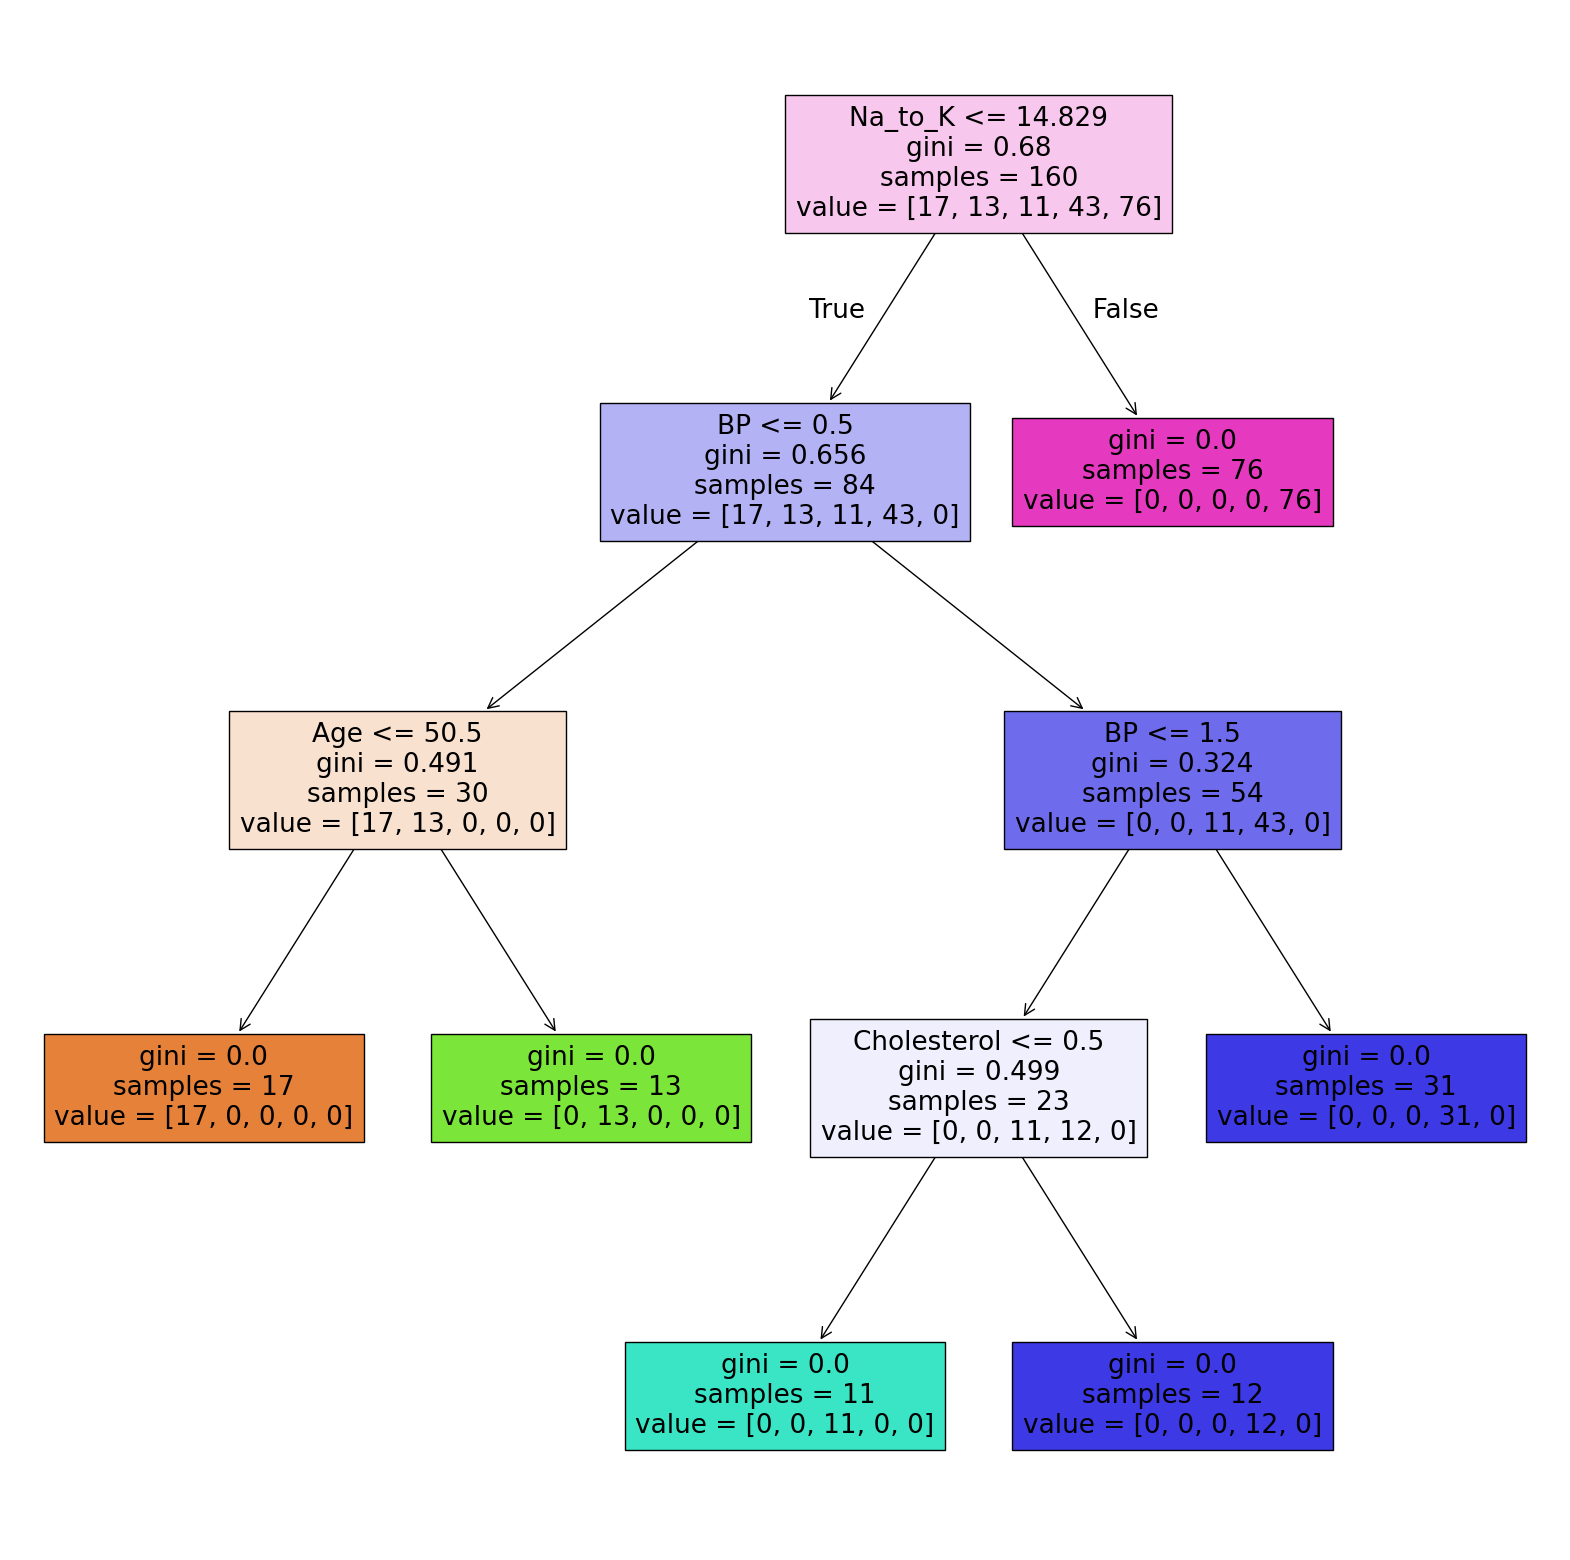

In [19]:
plt.figure(figsize=(20,20))
plot_tree(dt,filled=True,feature_names=x.columns)
class_name = ["<=50K",">50K"]
plt.show()